 Import user item data from json file to data frame

In [2]:
import csv
import ast
import json
import pandas as pd

csv_columns = ['user_id','item_id','item_name','playtime_forever']

with open('australian_users_items.json', encoding='utf-8') as data_file:
    
    with open('output_australian_users_items.csv', 'w', encoding='utf-8', newline='') as csv_file:
        line = data_file.readline()
        writer = csv.DictWriter(csv_file, fieldnames=csv_columns)
        writer.writeheader()
        while line:
            json_data = (ast.literal_eval(line))
            line = data_file.readline()
            for item in json_data["items"]:
                new_dict_data={'user_id':json_data["user_id"],'item_id':item['item_id'],'item_name':item['item_name'],'playtime_forever':item['playtime_forever']}
            
                writer.writerow(new_dict_data)
                line = data_file.readline()

In [3]:
print(__doc__)

import numpy as np
import scipy as sp
import pandas as pd

from sklearn.preprocessing import Imputer

#read the csv into a dataframe
users_items_df = pd.read_csv('output_australian_users_items.csv')


Automatically created module for IPython interactive environment


Import user review data into csv and then to data frame

In [4]:
import csv
import ast
import json
import pandas as pd

csv_columns = ['user_id','item_id','recommend']

with open('australian_user_reviews.json', encoding='utf-8') as data_file:
    
    with open('output_australian_user_reviews.csv', 'w', encoding='utf-8', newline='') as csv_file:
        line = data_file.readline()
        writer = csv.DictWriter(csv_file, fieldnames=csv_columns)
        writer.writeheader()
        while line:
            json_data = (ast.literal_eval(line))
            line = data_file.readline()
            for review in json_data["reviews"]:
                new_dict_data={'user_id':json_data["user_id"],'item_id':review['item_id'],'recommend':review['recommend']}
            
                writer.writerow(new_dict_data)
                line = data_file.readline()



In [5]:
print(__doc__)

import numpy as np
import scipy as sp
import pandas as pd

from sklearn.preprocessing import Imputer

#read the csv into a dataframe
user_reviews_df = pd.read_csv('output_australian_user_reviews.csv')


Automatically created module for IPython interactive environment


Merge user itema and user reviews based on user id and item id

In [6]:
merged_df = pd.merge(user_reviews_df, users_items_df, on=['item_id','user_id'], how='outer')
merged_df.head()

,user_id,item_id,recommend,item_name,playtime_forever
0,76561197970982479,1250,True,Killing Floor,10006.0
1,76561197970982479,22200,True,Zeno Clash,271.0
2,76561197970982479,43110,True,Metro 2033,834.0
3,maplemage,211420,True,NaN,NaN
4,maplemage,211820,True,NaN,NaN


Import bundle data into df from json

In [7]:
import csv
import ast
import json
import pandas as pd

import csv
import ast
import json
import pandas as pd

csv_columns = ['bundle_id','item_id','genre','discounted_price','bundle_final_price','bundle_price','bundle_name']

with open('bundle_data.json', encoding='utf-8') as data_file:
    
    with open('output_bundle_data.csv', 'w', encoding='utf-8', newline='') as csv_file:
        line = data_file.readline()
        writer = csv.DictWriter(csv_file, fieldnames=csv_columns)
        writer.writeheader()
        while line:
            json_data = (ast.literal_eval(line))
            line = data_file.readline()
            for item in json_data["items"]:
                new_dict_data={'bundle_id':json_data["bundle_id"],'item_id':item['item_id'],'genre':item['genre'],'discounted_price':item['discounted_price'],'bundle_final_price':json_data["bundle_final_price"],'bundle_price':json_data["bundle_price"],'bundle_name':json_data["bundle_name"]}
            
                writer.writerow(new_dict_data)
                line = data_file.readline()



In [8]:
print(__doc__)

import numpy as np
import scipy as sp
import pandas as pd

from sklearn.preprocessing import Imputer

#read the csv into a dataframe
bundle_df = pd.read_csv('output_bundle_data.csv')


Automatically created module for IPython interactive environment


In [9]:
bundle_df['item_id'] = bundle_df['item_id'].astype('str') 

In [10]:
merged_df['item_id'] = merged_df['item_id'].astype('str') 

Merge all the data based on item_id

In [11]:
merged_df_final = pd.merge(merged_df, bundle_df, on=['item_id'], how='outer')
merged_df_final.head()

,user_id,item_id,recommend,item_name,playtime_forever,bundle_id,genre,discounted_price,bundle_final_price,bundle_price,bundle_name
0,76561197970982479,1250,True,Killing Floor,10006.0,612.0,Action,$19.99,$67.20,$167.78,Killing Floor 1 Complete Your Set!
1,death-hunter,1250,True,NaN,NaN,612.0,Action,$19.99,$67.20,$167.78,Killing Floor 1 Complete Your Set!
2,diego9031,1250,True,NaN,NaN,612.0,Action,$19.99,$67.20,$167.78,Killing Floor 1 Complete Your Set!
3,GamerFag,1250,True,NaN,NaN,612.0,Action,$19.99,$67.20,$167.78,Killing Floor 1 Complete Your Set!
4,brendoboy,1250,True,NaN,NaN,612.0,Action,$19.99,$67.20,$167.78,Killing Floor 1 Complete Your Set!


Remove values not in right format

In [12]:
cleaned_data=merged_df_final[(merged_df_final.item_id != '200960,200980,200990,201000,201010') & (merged_df_final.item_id!='42170,204731,204732') & (merged_df_final.item_id!='10,80')]

Create model_data i.e. training data having recommended values

In [13]:
model_data=cleaned_data[(cleaned_data["recommend"].notnull())]

In [14]:
model_data=model_data[['user_id','item_id','recommend']]

In [15]:
import pandas as pd
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import SVDpp
from surprise import SVD
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.model_selection import train_test_split
from surprise.model_selection import ShuffleSplit
from surprise.model_selection import RepeatedKFold
import csv

In [16]:
reader = Reader(rating_scale=(0,1))
data=Dataset.load_from_df(model_data,reader) 

In [17]:
sp=ShuffleSplit(n_splits=20,random_state=10)

Apply SVD to model data

In [18]:
algo = SVD(n_factors=246,n_epochs=15,lr_all=0.03,reg_qi=0.080,random_state=20,init_std_dev=0.01)

In [19]:
for trainset, testset in sp.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.3047
RMSE: 0.3088
RMSE: 0.2992
RMSE: 0.3080
RMSE: 0.3062
RMSE: 0.3033
RMSE: 0.3098
RMSE: 0.3053
RMSE: 0.3089
RMSE: 0.3137
RMSE: 0.3098
RMSE: 0.2977
RMSE: 0.3050
RMSE: 0.3041
RMSE: 0.3052
RMSE: 0.3043
RMSE: 0.3077
RMSE: 0.3047
RMSE: 0.3034
RMSE: 0.3056


take all the NaN values to predict_data so that they can be predicted based on model

In [20]:
predict_data=cleaned_data[(cleaned_data["recommend"].isnull())]

In [21]:
predict_data=predict_data[['user_id','item_id','recommend']]

Predict recommend value True(1) or False(0)

In [22]:
for index,row in predict_data.iterrows():
        predR=algo.predict(uid= row["user_id"], iid= row["item_id"])
        row["recommend"]=str(round(predR[3]))
        

Drop duplicate values

In [23]:
predict_data.drop_duplicates()

,user_id,item_id,recommend
102,76561198002820828,1250,1.0
103,76561198028483487,1250,1.0
104,76561198079362142,1250,1.0
105,76561198042335464,1250,1.0
106,coolslayer666,1250,1.0
107,DakkeR,1250,1.0
108,Letachal,1250,1.0
109,76561197967443671,1250,1.0
110,lasle,1250,1.0
111,RoastedMemesRoastedDreams,1250,1.0


Take all the unique user id and bundle id NaN to be predicted for every user in new df

In [24]:
bundle_predict=predict_data[['user_id']]

In [25]:
bundle_predict.drop_duplicates()

,user_id
102,76561198002820828
103,76561198028483487
104,76561198079362142
105,76561198042335464
106,coolslayer666
107,DakkeR
108,Letachal
109,76561197967443671
110,lasle
111,RoastedMemesRoastedDreams


In [26]:
bundle_predict=bundle_predict.assign(bundle_id=np.nan)

Take bundle_id item_id user_id and recommend value in bundle_details for bundle_prediction

In [27]:
bundle_details=cleaned_data[['item_id','bundle_id']]

In [28]:
bundle_details=bundle_details.drop_duplicates()

In [29]:
bundle_details=bundle_details[bundle_details['bundle_id'].notnull()]

In [30]:
bundle_details

,item_id,bundle_id
0,1250,612.0
967,730,236.0
18590,8930,575.0
22747,49520,712.0
25702,261640,712.0
26163,265930,374.0
29740,313740,710.0
29796,330830,712.0
29834,240,236.0
31466,289130,448.0


In [31]:
bundle_details['bundle_id'] = bundle_details['bundle_id'].astype('str') 

bundle_count df to maintain count of items in every bundle for a user that has true value

In [32]:
bundle_count=bundle_details[['bundle_id']]

In [33]:
bundle_count=bundle_count.assign(count=0)

In [34]:
bundle_count=bundle_count.drop_duplicates()

In [35]:
pred_data = pd.merge(predict_data, bundle_df, on=['item_id'], how='inner')
pred_data.head()

,user_id,item_id,recommend,bundle_id,genre,discounted_price,bundle_final_price,bundle_price,bundle_name
0,76561198002820828,1250,1.0,612,Action,$19.99,$67.20,$167.78,Killing Floor 1 Complete Your Set!
1,76561198028483487,1250,1.0,612,Action,$19.99,$67.20,$167.78,Killing Floor 1 Complete Your Set!
2,76561198079362142,1250,1.0,612,Action,$19.99,$67.20,$167.78,Killing Floor 1 Complete Your Set!
3,76561198042335464,1250,1.0,612,Action,$19.99,$67.20,$167.78,Killing Floor 1 Complete Your Set!
4,coolslayer666,1250,1.0,612,Action,$19.99,$67.20,$167.78,Killing Floor 1 Complete Your Set!


In [36]:
pred_data=pred_data[['user_id','item_id','bundle_id','recommend']]

In [37]:
pred_data=pred_data.drop_duplicates()

In [38]:
pred_data1=pred_data[pred_data.recommend=='1.0']

In [39]:
pred_data1['bundle_id'] = pred_data1['bundle_id'].astype('str')

C:\Users\Kriti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
bundle_predict=bundle_predict.drop_duplicates()

In [41]:
bundle_predict=bundle_predict[bundle_predict['user_id'].notnull()]

Below logic will get bundle_id corresponding to every user

In [42]:

for index,row in bundle_predict.iterrows():
        user=row['user_id']
        bundle_count['count']=0
        
        
        for index,row_rec in pred_data1.iterrows():
            if ((row_rec['user_id']==user)):
             
                item=row_rec['item_id']
                bundle_count.loc[bundle_count.bundle_id == (row_rec['bundle_id']+".0"), 'count'] = bundle_count.loc[bundle_count.bundle_id == (row_rec['bundle_id']+".0"), 'count']+1
                
        bundle_count=bundle_count.sort_values(by='count',ascending=False)
       
        bundle_predict.loc[bundle_predict.user_id==user,'bundle_id']=bundle_count.iloc[0]['bundle_id']
        
      
      
    

In [43]:
bundle_final_predict=bundle_predict[bundle_predict['user_id'].notnull()]

Unique bundle_id recommended

In [44]:
bundle_final_predict['bundle_id'].unique()

array(['236.0', '712.0', '403.0', '425.0', '1303.0', '612.0', '951.0',
       '575.0', '1418.0', '728.0', '461.0', '1182.0', '710.0', '604.0',
       '249.0', '374.0', '1206.0', '241.0', '498.0', '342.0', '676.0',
       '448.0', '758.0', '577.0', '335.0', '501.0', '296.0', '320.0',
       '536.0'], dtype=object)

In [45]:
bundle_final_predict

,user_id,bundle_id
102,76561198002820828,236.0
103,76561198028483487,236.0
104,76561198079362142,236.0
105,76561198042335464,236.0
106,coolslayer666,236.0
107,DakkeR,712.0
108,Letachal,403.0
109,76561197967443671,236.0
110,lasle,236.0
111,RoastedMemesRoastedDreams,236.0


In [46]:
temp_data1=cleaned_data[['bundle_id','bundle_name','bundle_final_price']]

In [47]:
temp_data1['bundle_id'] = temp_data1['bundle_id'].astype('str')

C:\Users\Kriti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
recommend_bundle1 = pd.merge(bundle_final_predict, temp_data1, on=['bundle_id'], how='inner')
recommend_bundle1.head()

,user_id,bundle_id,bundle_name,bundle_final_price
0,76561198002820828,236.0,Counter-Strike Complete,$29.22
1,76561198002820828,236.0,Counter-Strike Complete,$29.22
2,76561198002820828,236.0,Counter-Strike Complete,$29.22
3,76561198002820828,236.0,Counter-Strike Complete,$29.22
4,76561198002820828,236.0,Counter-Strike Complete,$29.22


In [49]:
recommend_bundle1=recommend_bundle1.drop_duplicates()

Final bundle recommendation with user_id, bundle_id, discounted_price

In [50]:
recommend_bundle1

,user_id,bundle_id,bundle_name,bundle_final_price
0,76561198002820828,236.0,Counter-Strike Complete,$29.22
2595,76561198028483487,236.0,Counter-Strike Complete,$29.22
5190,76561198079362142,236.0,Counter-Strike Complete,$29.22
7785,76561198042335464,236.0,Counter-Strike Complete,$29.22
10380,coolslayer666,236.0,Counter-Strike Complete,$29.22
12975,76561197967443671,236.0,Counter-Strike Complete,$29.22
15570,lasle,236.0,Counter-Strike Complete,$29.22
18165,RoastedMemesRoastedDreams,236.0,Counter-Strike Complete,$29.22
20760,76561198098482126,236.0,Counter-Strike Complete,$29.22
23355,Wallfinstein,236.0,Counter-Strike Complete,$29.22


In [51]:
bundle_df['bundle_id'] = bundle_df['bundle_id'].astype('str')

Function when passed user id will provide output recommended bundle with items and discounted price

In [52]:
def getBundleDetails(user_id):
    print("Try using this bundle with your favorite items:")
    for index,row in recommend_bundle1.iterrows():
        if(user_id==row['user_id']):
            bundle_id=row['bundle_id']
            print("Total bundle price: "+row['bundle_final_price'])
            
    print("Bundle contains following items with discounted price over each item as below:")
    
    for index,row1 in bundle_df.iterrows():
        if(bundle_id==(row1['bundle_id']+".0")):
            print("item id: "+row1["item_id"]+" discounted price on item with bundle: "+row1["discounted_price"])
           
    

In [53]:
getBundleDetails('miochandesu')

Try using this bundle with your favorite items:
Total bundle price: $20.67
Bundle contains following items with discounted price over each item as below:
item id: 333600 discounted price on item with bundle: $9.99
item id: 385800 discounted price on item with bundle: $2.99
item id: 420110 discounted price on item with bundle: $9.99


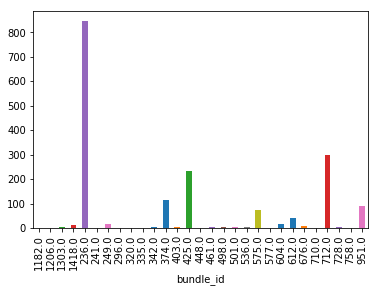

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

recommend_bundle1.groupby('bundle_id')['user_id'].nunique().plot(kind='bar')
plt.show()